# Introdution to Pattern Recognition and Machine Learning 
Assignment - 01


Name : Guru Prasad K M 

Specialization : Cse(Data Science)

Roll_No : BU22CSEN0500316

Topic : Automated Diagnosis of Sleep Disorders from Polysomnography Data

#  Import required libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
import shap


# Step 1: Load and Explore the Dataset

In [3]:
data = pd.read_csv(r'c:\\Users\\gurup\\OneDrive\\Desktop\\6Semester\\Intro to PR And ML\\archive\\psg_data.csv')
print(data)

     Time       EEG       EOG       EMG       ECG   Airflow  Chest_Movement  \
0    0.00  0.049671  0.699678  0.000964  0.097207 -1.352196       -0.607209   
1    0.01  0.017584  0.462317 -0.653671 -0.246670 -0.314942        0.228119   
2    0.02  0.127559  0.029815  0.527397  0.341871 -0.244137        0.805648   
3    0.03  0.246411 -0.323468  0.750056  0.093156  0.316663        0.482972   
4    0.04  0.101918  0.349112 -1.286048  0.229963  0.011315        0.900770   
..    ...       ...       ...       ...       ...       ...             ...   
995  9.95 -0.184544  0.535075 -0.688308 -0.315258 -0.226707       -0.168451   
996  9.96  0.054435 -0.013261 -0.330884 -0.245087 -0.897822       -0.048976   
997  9.97 -0.030024 -0.440937  1.510150 -0.092855 -0.165045        0.615085   
998  9.98 -0.119908 -0.081533  0.445242 -0.398705  0.366415       -1.943789   
999  9.99  0.025848 -0.372451 -1.068385  0.055723 -0.637116       -0.187009   

          SpO2  Apnea_Label  
0    97.986594       

In [3]:
# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Head:
   Time       EEG       EOG       EMG       ECG   Airflow  Chest_Movement  \
0  0.00  0.049671  0.699678  0.000964  0.097207 -1.352196       -0.607209   
1  0.01  0.017584  0.462317 -0.653671 -0.246670 -0.314942        0.228119   
2  0.02  0.127559  0.029815  0.527397  0.341871 -0.244137        0.805648   
3  0.03  0.246411 -0.323468  0.750056  0.093156  0.316663        0.482972   
4  0.04  0.101918  0.349112 -1.286048  0.229963  0.011315        0.900770   

        SpO2  Apnea_Label  
0  97.986594            0  
1  97.957825            0  
2  98.068164            0  
3  97.923543            0  
4  97.913934            0  

Missing Values:
Time              0
EEG               0
EOG               0
EMG               0
ECG               0
Airflow           0
Chest_Movement    0
SpO2              0
Apnea_Label       0
dtype: int64


# Step 2: Visualize the Distribution of the Target Variable


C:\Users\gurup\AppData\Local\Temp\ipykernel_9152\4243104101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Apnea_Label', data=data, palette='Set2')


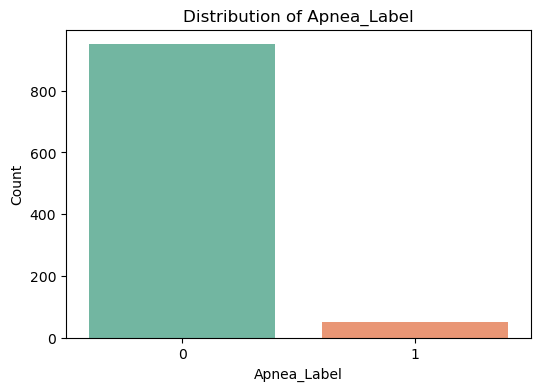

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Apnea_Label', data=data, palette='Set2')
plt.title('Distribution of Apnea_Label')
plt.xlabel('Apnea_Label')
plt.ylabel('Count')
plt.show()

# Step 3: Prepare the Data for Training

In [5]:
X = data.drop(columns=['Apnea_Label'])
y = data['Apnea_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the Model

In [6]:
def create_model(units=64, dropout_rate=0.5, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Cross-Validation

In [7]:

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model_cv = create_model()
    model_cv.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, verbose=0)
    
    y_val_pred = (model_cv.predict(X_val_fold) > 0.5).astype(int)
    cv_scores.append(accuracy_score(y_val_fold, y_val_pred))

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Cross-Validation Accuracy Scores: [0.9625, 0.96875, 0.90625, 0.95625, 0.94375]
Mean Cross-Validation Accuracy: 0.9475



# Step 6: Hyperparameter Tuning

In [8]:
model_tune = KerasClassifier(model=create_model, verbose=0)

param_grid = {
    'model__units': [32, 64, 128],
    'model__dropout_rate': [0.3, 0.5, 0.7],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32, 64],
    'epochs': [20, 30, 50]
}

In [9]:

random_search = RandomizedSearchCV(estimator=model_tune, param_distributions=param_grid, n_iter=10, cv=3, verbose=1)
random_search_result = random_search.fit(X_train, y_train)

print("Best Parameters:", random_search_result.best_params_)
print("Best Score:", random_search_result.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\gurup\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Best Parameters: {'model__units': 128, 'model__optimizer': 'rmsprop', 'model__dropout_rate': 0.3, 'epochs': 30, 'batch_size': 32}
Best Score: 0.9474998357316512


# Step 7: Model Interpretation (SHAP)


In [10]:
explainer = shap.DeepExplainer(random_search_result.best_estimator_.model_, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

if isinstance(shap_values, list):
    shap_values = shap_values[0]  # Select the SHAP values for the first class

# Define feature names (adjust based on your dataset)
feature_names = ['feature1', 'feature2', 'feature3', 'feature4',
                 'feature5', 'feature6', 'feature7', 'feature8']


c:\Users\gurup\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(


# Step 8:Plot SHAP summary


<Figure size 640x480 with 0 Axes>

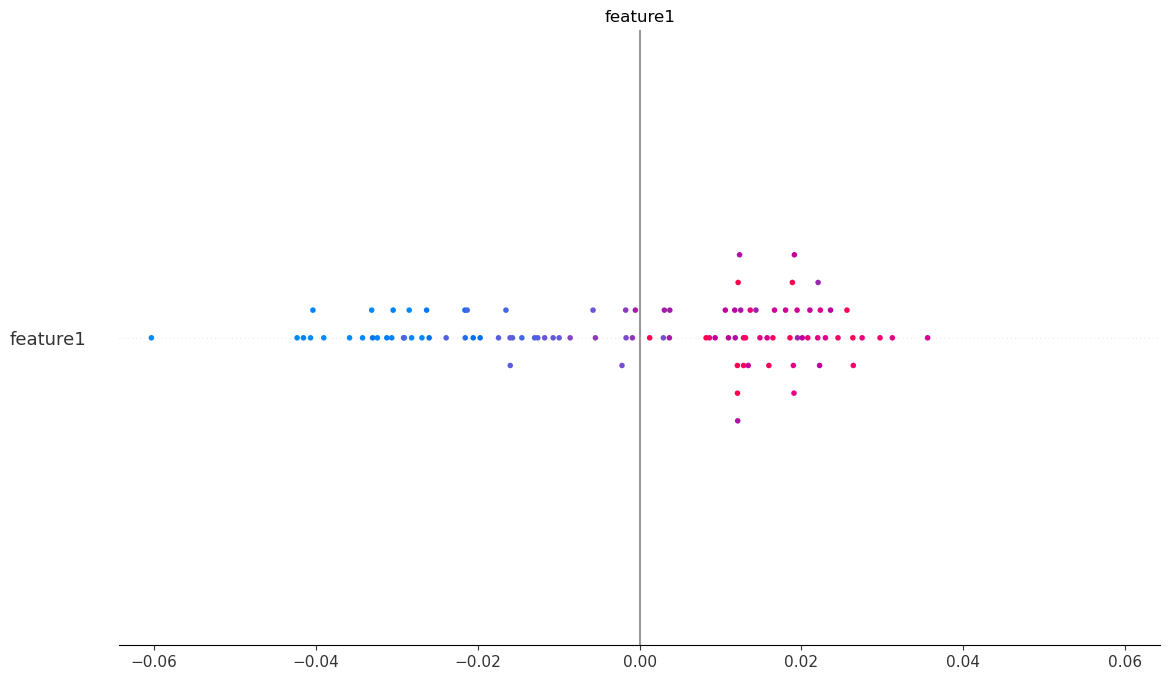

In [11]:

shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)